In [11]:
#This is an example notebook that shows how the Event_Visualizer class can be used.
from event_visualizer import Event_Visualizer
import ROOT as r
%load_ext autoreload
%autoreload 2

import re

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
EV = Event_Visualizer()

input_file = r.TFile("~/pioneer/main/run/pienu00000-01.root")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


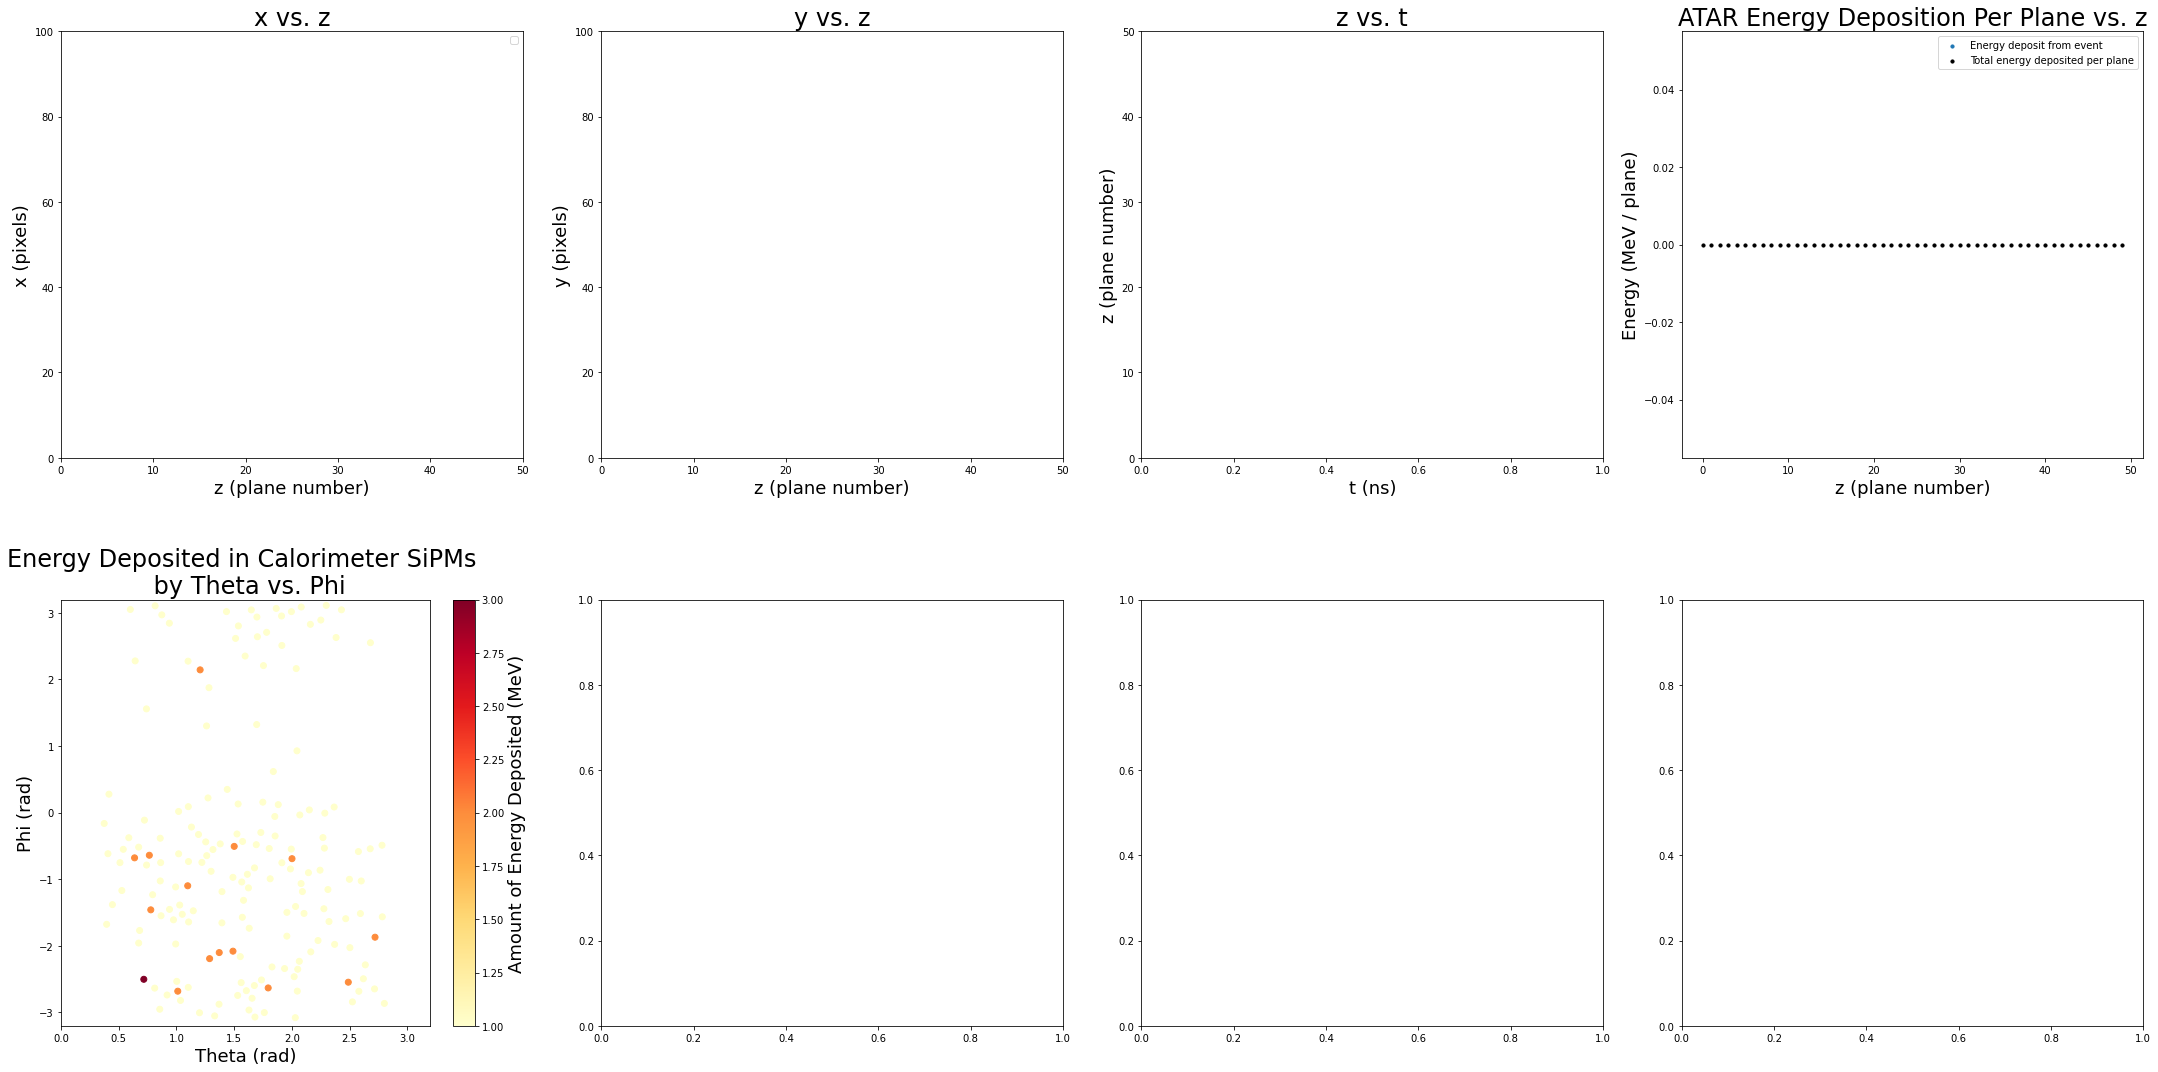

In [16]:
# TODO Event ID isn't currently used; display events live now, maybe use another system?
#The most basic functionality for displaying our event.
EV.visualize_event(input_file, 1, display_text_output=False);

In [17]:
#TESTING STUFF
tree = input_file.Get("sim")

#Arrays to store pixel information to be added.
pixel_times = []
pixel_IDs = []
pixel_edep = []
pixel_pdgs = []

sipm_ids = []
sipm_edeps = []

for branch in tree:
    for atar in branch.atar:
        pixel_times.append(atar.GetTime())
        pixel_IDs.append(atar.GetPixelID())
        pixel_edep.append(atar.GetEdep())
        pixel_pdgs.append(atar.GetPDGID())

    #Loop over the sipm branch to get the IDs of the SiPMs that were hit.
    for sipm in branch.sipm:
        sipm_ids.append(sipm.GetID())
        sipm_edeps.append(sipm.GetNHits())


# print(pixel_times, "\n\n")
# print(pixel_IDs, "\n\n")
# print(pixel_edep, "\n\n")
# print(pixel_pdgs, "\n\n")
# print(sipm_ids, "\n\n")
# print(sipm_edeps)

[2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
geom_file = '/home/cole/pioneer/main/MonteCarlo/geometry/generator/test_output.gdml'
def get_crystal_data_from_gdml(geom_file, key):
    rotations = {}
    with open(geom_file, 'r') as gf:
        for line in gf:
            if(key in line and 'wrap' not in line):
                #Only try to get a 5-digit index if the line has one in the first place. Calo IDs are of the form 32xxxx, so we need to take the ID mod 32000
                #to get the actually useful digits off the end.
                if re.search("_\d{5,7}_", line) != None:
                    id_delimited = re.findall("_\d{5,7}_", line)[0]
                    crystal_id = int( id_delimited.split("_")[1] )
                    x = float( line.split()[2].split('"')[1] )
                    y = float( line.split()[3].split('"')[1] )
                    z = float( line.split()[4].split('"')[1] )
                    rotations[crystal_id] = (-x,-y,-z)
                    # print(crystal_id)
    return rotations

sipm_posns = get_crystal_data_from_gdml(geom_file, key='<position name="sipm_enclosure')
print(sipm_posns)

In [ ]:
#The most basic functionality for displaying our event.
#EV.visualize_event(input_file, 1)

hist = r.TH1F("h1", "Edep", 100, 0, 100)

# for entry in tree:
#     for atar in entry.atar:
#         #hist.Fill(calo.GetTotalEnergyDeposit())
#         print(atar.edep)

canv = r.TCanvas()
hist.Draw()
canv.Update()
canv.Draw()

In [ ]:
#Adding some extra parameters and getting some extra outputs from our display.
max_Es, gap_times = EV.visualize_event(input_file, 217, is_event_DAR = 2, display_text_output = True)